# I have to compress 100 images

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
import glob #allows us to list all the files in a directory

# Attempt on one channel 

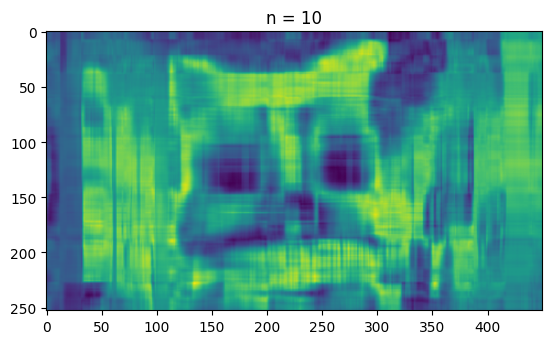

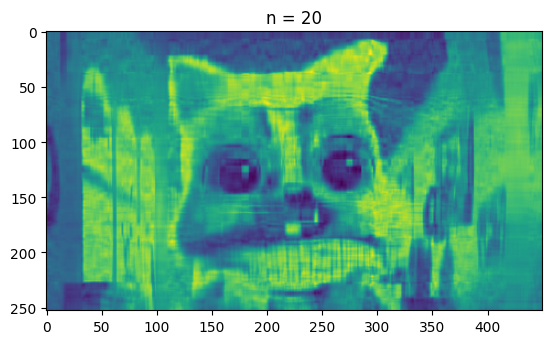

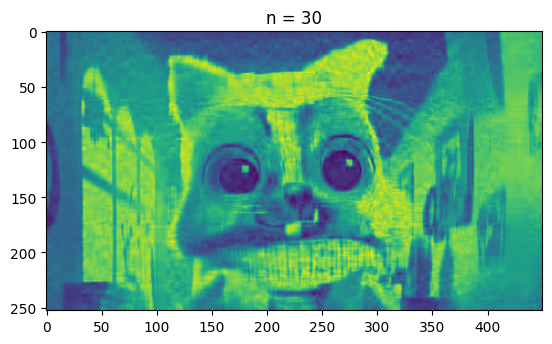

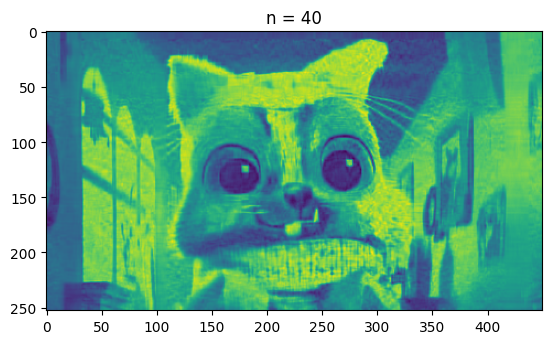

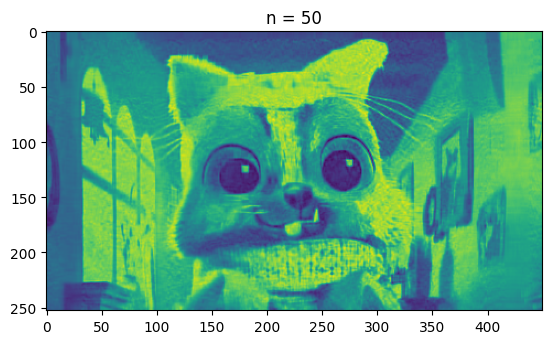

In [2]:
from PIL import Image

img = Image.open('perrito.jpeg')
img_array = np.asarray(img)

img_array_0 = img_array[:,:,0] 
img_array_1 = img_array[:,:,1]
img_array_2 = img_array[:,:,2]

u0, sigma0, v0 = np.linalg.svd(img_array_0)
s0 = np.diag(sigma0)

for k in range(10, 51, 10):
    img0_remake = np.matrix(u0[:, :k]) * np.matrix(s0[0:k, :k]) * np.matrix(v0[:k, :])
    plt.imshow(img0_remake)
    title = "n = %s" % k
    plt.title(title)
    plt.show()



# Attempt on all images channels

In [3]:
k=20

from PIL import Image

img = Image.open('gato.jpg')
img_array = np.asarray(img)

img_array_0 = img_array[:,:,0] 
img_array_1 = img_array[:,:,1]
img_array_2 = img_array[:,:,2]

u0, sigma0, v0 = np.linalg.svd(img_array_0)
s0 = np.diag(sigma0)

u1, sigma1, v1 = np.linalg.svd(img_array_1)
s1 = np.diag(sigma1)

u2, sigma2, v2 = np.linalg.svd(img_array_2)
s2 = np.diag(sigma2)
 
img0_remake = u0[:, :k] @ s0[0:k, :k] @ v0[:k, :]
img1_remake = u1[:, :k] @ s1[0:k, :k] @ v1[:k, :]
img2_remake = u2[:, :k] @ s2[0:k, :k] @ v2[:k, :]

print(u0[:, :k].shape)
print(s0[0:k, :k].shape)
print(v0[:k, :].shape)


compressed = np.dstack((img0_remake, img1_remake, img2_remake))
compressed = compressed.astype(np.uint8)

img_comp = Image.fromarray(compressed)
img_comp.save('gatok20.jpg')

(960, 20)
(20, 20)
(20, 1280)


# Trying to make a function

In [66]:
def compress_image(input_image_path):
    img = Image.open(input_image_path)
    img_array = np.asarray(img)
    
    channels_matrix = []  #aqui guardo mi im0 1 y 2
    for i in range(0,3):
        img_ch = img_array[:,:,i]
        u, sigma, v = np.linalg.svd(img_ch)
        s = np.diag(sigma)
        channels_matrix.append((u, sigma, v, s)) #guardo el svd de cada canal
    return channels_matrix

def descompressed_image(channels_matrix, quality_fraction, name_output_image):
    print(len(channels_matrix[0][3]))
    max_num_columns = len(channels_matrix[0][3][0])  #0 canal, 1 por sigma, 0 primera fila de sigma
    
    k=0
    if quality_fraction != 0:
        k= int(max_num_columns / quality_fraction)
    print(k)
    
    decompress_matrix = []
    
    for i in range(0,3):
      print(channels_matrix[i][0][:, :k].shape) 
      print(channels_matrix[i][3][0:k, :k].shape) 
      print(channels_matrix[i][2][:k, :].shape)  
      
      decompress_matrix.append(channels_matrix[i][0][:, :k] @ channels_matrix[i][3][0:k, :k]  @  channels_matrix[i][2][:k , :])

    compressed = np.dstack((decompress_matrix[0], decompress_matrix[1], decompress_matrix[2]))
    compressed = compressed.astype(np.uint8)

    img_comp = Image.fromarray(compressed)
    img_comp.save(name_output_image)

descompressed_image(compress_image('gato.jpg'), 0, 'gato_comp.jpg')

960
0
(960, 0)
(0, 0)
(0, 1280)
(960, 0)
(0, 0)
(0, 1280)
(960, 0)
(0, 0)
(0, 1280)


# The nice function

In [26]:
def compress_image(input_image, ratio):
    img = Image.open(input_image)
    img_array = np.asarray(img)
    
    channels_matrix = np.zeros_like(img_array)  #aqui guardo mi im0 1 y 2
    for i in range(0,3):
        img_channels = img_array[:,:,i]
        u, sigma, v = np.linalg.svd(img_channels)
        s = np.diag(sigma)
        
        k = int(ratio * np.shape(s)[0])
        print(k)
        
        u = u[:, :k]
        s = s[0:k, :k]
        v = v[:k, :]
        channels_matrix[:,:,i] = u @ s @ v #guardo el svd de cada canal
        
    compressed = np.dstack((channels_matrix[:,:,0], channels_matrix[:,:,1], channels_matrix[:,:,2]))
    compressed = compressed.astype(np.uint8)
    
    new_img = Image.fromarray(compressed)
    n_per=str(ratio)
    n="_compress_"+n_per+".jpg"
    new_img.save(input_image[:-4]+n)


In [32]:
compress_image('gato.jpg', 0)

0
0
0
